In [3]:
### Import all the required libraries
import os
import sys

import pandas as pd
import numpy as np

import pymysql.cursors          #### For mysql connectivity

from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [6]:
#### Connect to mysql using the appropriate credentials to the desired database.

connection = pymysql.connect(host='172.16.0.249',
                             user='insofeadmin',
                             password='Insofe_passw0rd',
                             db='insofe_results_B291289',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
### Extract data from active_emp_details table

        query = "SELECT * FROM `active_emp_details`"
        cursor.execute(query)
        active_employees = cursor.fetchall()

### Extract data from dept_aggr_by_gender table
        query = "SELECT * FROM `dept_aggr_by_gender`"
        cursor.execute(query)
        dept_aggr_gender = cursor.fetchall()

### Extract data from dept_aggr table
        query = "SELECT * FROM `dept_aggr`"
        cursor.execute(query)
        dept_aggr_all = cursor.fetchall()
        #print(dept_aggr_all)
        
finally:
    connection.close()

In [7]:
### Above results returns as lists
type(dept_aggr_all)

list

In [8]:
active_employees_DF = pd.DataFrame(active_employees, columns=["emp_no", "first_name", "last_name", "gender", "birth_date", "hire_date", "dept_no", "dept_name", "dept_from_date", "salary", "salary_from_date", "title", "title_from_date", "manager_emp_no", "manager_first_name", "manager_last_name", "manager_gender", "manager_birth_date", "manager_hire_date", "manager_from_date", "age", "tenure", "manager_age", "manager_tenure", "salary_since", "role_since"])
dept_aggr_all_DF = pd.DataFrame(dept_aggr_all, columns=["dept_no", "dept_name", "tot_emp", "tot_sal", "min_sal", "max_sal", "avg_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure", "avg_tenure", "avg_sal_change", "avg_role_change"]) 
dept_aggr_gender_DF = pd.DataFrame(dept_aggr_gender, columns=["dept_no", "dept_name", "gender", "tot_emp", "tot_sal", "min_sal", "max_sal", "avg_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure", "avg_tenure", "avg_sal_change", "avg_role_change"])

In [9]:
active_employees_DF = pd.read_csv('./active_employees_data.csv', 
                                  names=["emp_no", "first_name", "last_name", "gender", "birth_date", "hire_date", "dept_no", "dept_name", "dept_from_date", "salary", "salary_from_date", "title", "title_from_date", "manager_emp_no", "manager_first_name", "manager_last_name", "manager_gender", "manager_birth_date", "manager_hire_date", "manager_from_date", "age", "tenure", "manager_age", "manager_tenure", "salary_since", "role_since"])

In [10]:
active_employees_DF.head()

,emp_no,first_name,last_name,gender,birth_date,hire_date,dept_no,dept_name,dept_from_date,salary,...,manager_gender,manager_birth_date,manager_hire_date,manager_from_date,age,tenure,manager_age,manager_tenure,salary_since,role_since
0,1,Margareta,Markovitch,M,1958-09-12,1986-01-01,d001,Marketing,1986-01-01,107407,...,M,1967-06-21,1988-04-12,1993-10-01,59,31,50,29,14,25
1,2,Ebru,Alpin,M,1961-10-28,1986-01-01,d002,Finance,1986-01-01,87443,...,F,1959-03-28,1986-01-14,1990-12-17,55,31,58,31,14,26
2,3,Shirish,Ossenbruggen,F,1955-06-24,1986-01-01,d003,Human Resources,1986-01-01,78229,...,F,1960-12-02,1986-08-04,1993-03-21,62,31,56,31,14,24
3,4,Krassimir,Wegerle,F,1958-06-08,1986-01-01,d004,Production,1986-01-01,71583,...,M,1981-07-27,2001-02-05,2005-08-30,59,31,36,16,14,28
4,5,DeForest,Hagimont,M,1959-07-08,1986-01-01,d005,Development,1986-01-01,71903,...,F,1970-04-25,1989-10-21,1995-04-25,58,31,47,27,14,24


In [11]:
dept_aggr_all_DF = pd.read_csv('./dept_aggr.csv', 
            names=["dept_no", "dept_name", "tot_emp", "tot_sal", "min_sal", "max_sal", "avg_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure", "avg_tenure", "avg_sal_change", "avg_role_change"]) 

In [12]:
dept_aggr_all_DF.head()

,dept_no,dept_name,tot_emp,tot_sal,min_sal,max_sal,avg_sal,min_age,max_age,avg_age,min_tenure,max_tenure,avg_tenure,avg_sal_change,avg_role_change
0,d001,Marketing,15803,1164937153,12501,144128,73716.202810,22,65,44.997469,0,31,19.559261,8.300006,13.599949
1,d002,Finance,13494,976025645,12701,141395,72330.342745,22,65,44.897881,0,31,19.291018,8.211279,13.435453
2,d003,Human Resources,13876,813433698,12669,140953,58621.627126,22,65,44.947968,0,31,19.386927,8.248847,13.491784
3,d004,Production,54280,3346570168,12568,137497,61653.835077,22,65,45.580951,0,31,20.413707,8.612970,14.435888
4,d005,Development,62344,3827231785,12582,142434,61388.935343,22,65,45.569213,0,31,20.446827,8.625353,14.414234


In [13]:
dept_aggr_gender_DF = pd.read_csv('./dept_aggr_by_gender.csv', 
               names=["dept_no", "dept_name", "gender", "tot_emp", "tot_sal", "min_sal", "max_sal", "avg_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure", "avg_tenure", "avg_sal_change", "avg_role_change"])

In [14]:
dept_aggr_gender_DF.head()

,dept_no,dept_name,gender,tot_emp,tot_sal,min_sal,max_sal,avg_sal,min_age,max_age,avg_age,min_tenure,max_tenure,avg_tenure,avg_sal_change,avg_role_change
0,d001,Marketing,F,6338,465218859,13110,137842,73401.523982,22,65,44.727674,0,31,19.218997,8.163301,13.325813
1,d001,Marketing,M,9465,699718294,12501,144128,73926.919599,22,65,45.178130,0,31,19.787110,8.391548,13.783518
2,d002,Finance,F,5541,402511864,13007,137300,72642.458762,22,65,44.788847,0,31,19.001624,8.108825,13.315467
3,d002,Finance,M,7953,573513781,12701,141395,72112.885829,22,65,44.973846,0,31,19.492644,8.282661,13.519049
4,d003,Human Resources,F,5638,332413592,12669,137321,58959.487762,22,65,44.754878,0,31,19.088152,8.147747,13.277581


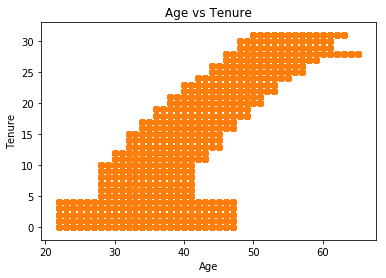

In [15]:
### Draw a scatter plot to identify the relation between employees age and tenure
plt.scatter(active_employees_DF.age, active_employees_DF.tenure)
X = active_employees_DF.age
Y = active_employees_DF.tenure
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.title("Age vs Tenure")
plt.scatter(X,Y)
plt.show()

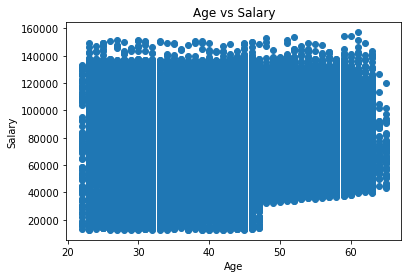

In [16]:
### Draw a scatter plot to identify the relation between employees age and salary
X = active_employees_DF.age
Y = active_employees_DF.salary
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.scatter(X,Y)
plt.show()

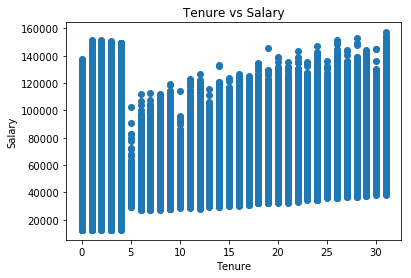

In [17]:
### Draw a scatter plot to identify the relation between employees tenure and salary
X = active_employees_DF.tenure
Y = active_employees_DF.salary
plt.xlabel("Tenure")
plt.ylabel("Salary")
plt.title("Tenure vs Salary")
plt.scatter(X,Y)
plt.show()

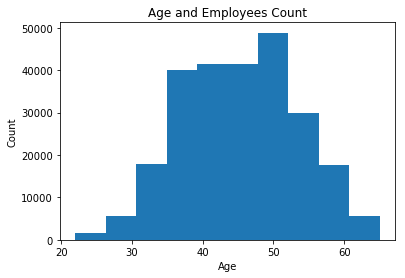

In [18]:
### Draw histogram for the employees count in each age group
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age and Employees Count")
plt.hist(active_employees_DF.age)
plt.show()

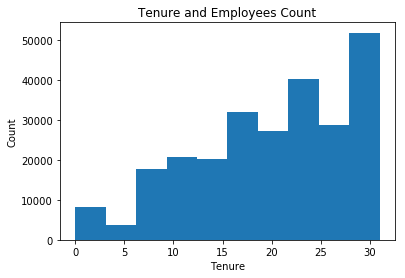

In [19]:
### Draw histogram for the employees count by tenure
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Tenure and Employees Count")
plt.hist(active_employees_DF.tenure)
plt.show()

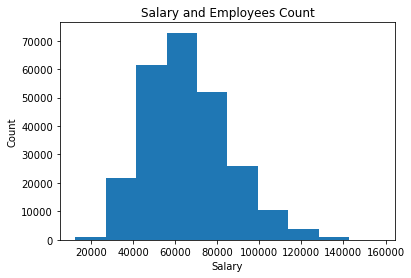

In [20]:
### Draw histogram for the employees count by salary
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Salary and Employees Count")
plt.hist(active_employees_DF.salary)
plt.show()

In [21]:
### Extract Male and Female employees counts in each department
Y1 = dept_aggr_gender_DF['tot_emp'][dept_aggr_gender_DF['gender'] == 'M']
Y2 = dept_aggr_gender_DF['tot_emp'][dept_aggr_gender_DF['gender'] == 'F']

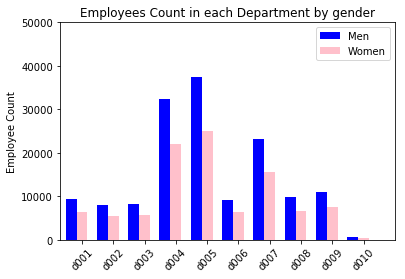

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 10

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, Y1, width, color='blue')

rects2 = ax.bar(ind+width, Y2, width, color='pink')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0, 50000)
ax.set_ylabel('Employee Count')
ax.set_title('Employees Count in each Department by gender')
xTickMarks = ['d001', 'd002', 'd003', 'd004', 'd005', 'd006', 'd007', 'd008', 'd009', 'd010']
#xTickMarks = ['dep'+str(i) for i in range(1,11)]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [23]:
# Randomly sample 5% of your dataframe
# sample_5percent = active_employees_DF.sample(frac=0.05)

# Randomly sample 1000 rows from your dataframe
sample_5percent = active_employees_DF.sample(n=200)
sample_5percent
#For either approach above, you can get the rest of the rows by doing:

#sample_rest = active_employees_DF.loc[~Factive_employees_DF.index.isin(sample_5percent.index)]

,emp_no,first_name,last_name,gender,birth_date,hire_date,dept_no,dept_name,dept_from_date,salary,...,manager_gender,manager_birth_date,manager_hire_date,manager_from_date,age,tenure,manager_age,manager_tenure,salary_since,role_since
95078,119051,Anneke,Boissier,M,1970-05-14,1993-06-09,d005,Development,1993-06-09,67535,...,F,1970-04-25,1989-10-21,1995-04-25,47,24,47,27,10,18
75055,93975,Alagu,Randt,M,1963-07-16,1991-09-01,d004,Production,2001-08-18,48243,...,M,1981-07-27,2001-02-05,2005-08-30,54,26,36,16,12,16
128908,161189,Angel,Peron,F,1972-08-27,1996-11-14,d007,Sales,1996-11-14,62584,...,M,1961-03-16,1989-12-30,1994-03-07,45,20,56,27,8,12
183869,229885,Aran,Fritzsche,F,1983-07-28,2002-10-26,d006,Quality Management,2002-10-26,44506,...,M,1972-08-19,1995-06-09,2000-06-28,34,14,45,22,5,14
119854,149853,Somnath,Valiente,F,1972-09-16,1995-06-18,d008,Research,1995-06-18,68694,...,F,1962-06-27,1993-01-31,1996-04-08,45,22,55,24,9,13
26989,33688,Odysseas,Billawala,M,1964-01-22,1987-12-15,d007,Sales,1997-04-06,106474,...,M,1961-03-16,1989-12-30,1994-03-07,53,29,56,27,13,20
44097,55090,Tokuyasu,Heuter,M,1962-10-24,1989-07-17,d003,Human Resources,1989-07-17,96653,...,F,1960-12-02,1986-08-04,1993-03-21,54,28,56,31,12,23
110093,137821,Oscal,Angelov,M,1972-12-18,1995-01-18,d007,Sales,2004-04-13,59362,...,M,1961-03-16,1989-12-30,1994-03-07,44,22,56,27,9,13
202100,252505,Gladys,Wursthorn,M,1986-06-25,2005-02-01,d002,Finance,2010-02-18,43666,...,F,1959-03-28,1986-01-14,1990-12-17,31,12,58,31,4,7
53989,67511,Kannan,Stille,F,1960-06-18,1989-11-22,d004,Production,1996-07-09,70206,...,M,1981-07-27,2001-02-05,2005-08-30,57,27,36,16,12,21


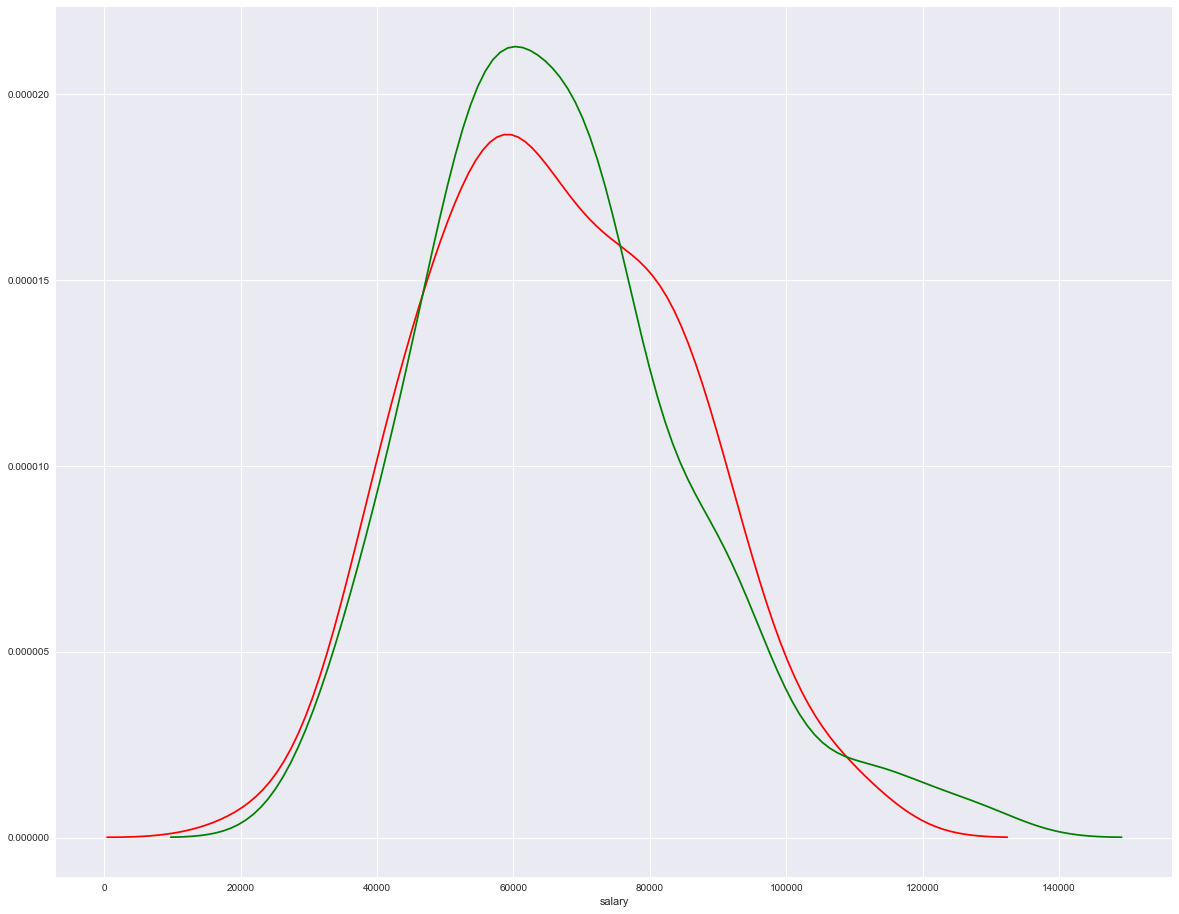

In [24]:
import seaborn as sn
plt.figure(figsize=(20, 16))

#sn.distplot( active_employees_DF[active_employees_DF.gender == 'M'].salary, hist = False, color = 'r' )
#sn.distplot( active_employees_DF[active_employees_DF.gender == 'F'].salary, hist = False, color = 'g' )

sn.distplot( sample_5percent[sample_5percent.gender == 'M'].salary, hist = False, color = 'r')
sn.distplot( sample_5percent[sample_5percent.gender == 'F'].salary, hist = False, color = 'g')